<img src="escuela_economia_una_logo.png" width="260" height="60">
<center>
    <b>Econometría</b><br>
    <b>Profesor:  Alexander Amoretti</b><br>
    <b>Desarrollo:  Diego Armando Barquero Sánchez, Estudiante de Tercer Ciclo</b>
<br><br>   
<div style="font-size:200%;color:white; background-color: #A93226;">Holt Simple</div>
<div style="font-size:100%;color:white; background-color: #A93226;">Proyección de las Exportaciones en Costa Rica</div>

<i>Creado:     2023-May-24 
    <br>
    Actualizado: 2023-May-26 </i>

# *Librerías Empleadas*

In [2]:
# Basics for Data Analysis 
import numpy as np
import pandas as pd
# Basics for Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# regression basics 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import warnings
warnings.filterwarnings('ignore')

# *Cargamos los datos*¨
### *Empleando la librería pandas*

In [21]:
datos = pd.read_excel('datos.xlsx')

In [22]:
datos.head()

,Tiempo,Mes,ExpFOB,Ln(ExpFOB)
0,1,1997-12-31,357.601980,NaN
1,2,1998-01-31,392.519491,0.093166
2,3,1998-02-28,368.733105,-0.062513
3,4,1998-03-31,458.557503,0.218013
4,5,1998-04-30,459.825590,0.002762


# *Le cambiamos y adaptamos el índice para que sea más sencillo realizar la visualización empleando matplotlib*

In [5]:
index = pd.Index(sm.tsa.datetools.dates_from_range("1997M12", "2022M12"))
datos.set_index(index, inplace=True)

## *Realizamos un gráfico para ver la serie de tiempo*

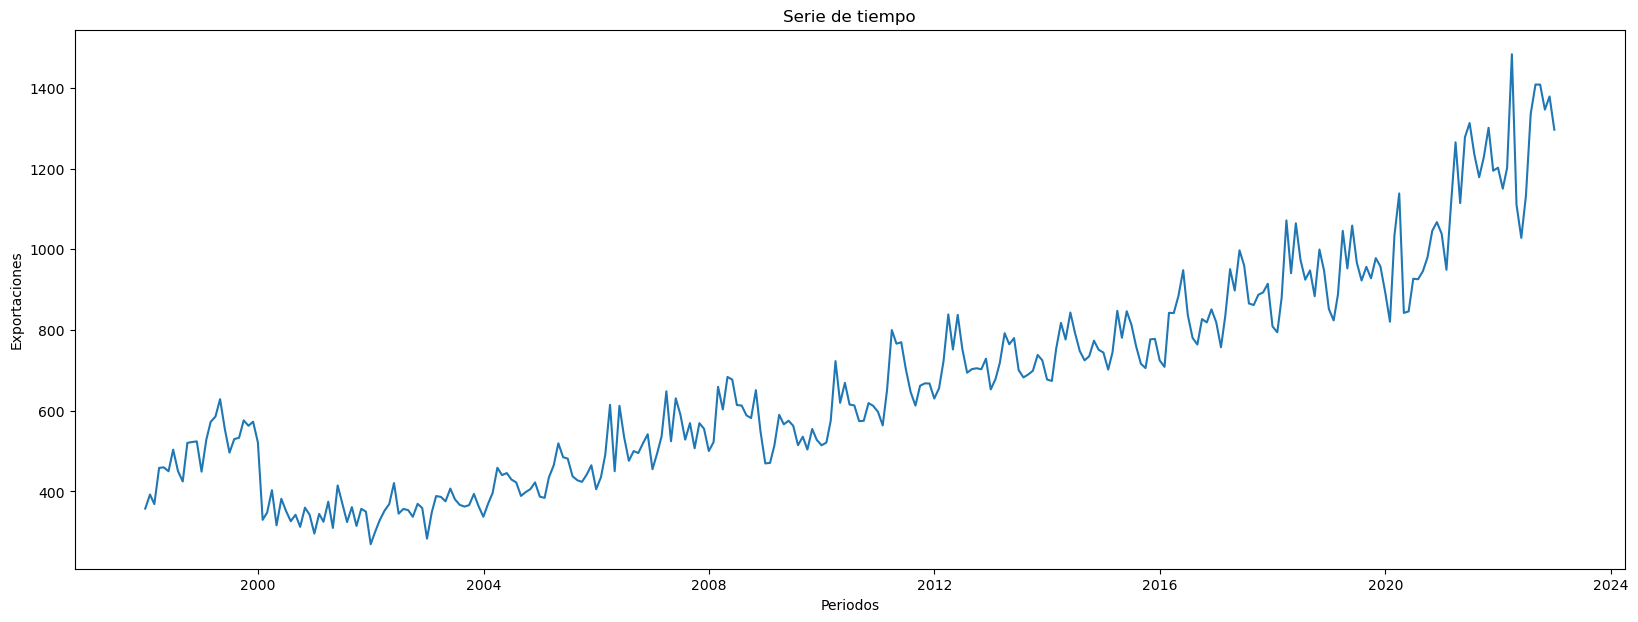

In [6]:
plt.figure(figsize = (20,7))
plt.plot(datos.index, datos['ExpFOB'])

plt.xlabel('Periodos')
plt.ylabel('Exportaciones')
plt.title('Serie de tiempo')
plt.show()
     

## *Realizamos un gráfico para ver la serie de tiempo* 
### *En este caso de la variación a través del log de la variable*

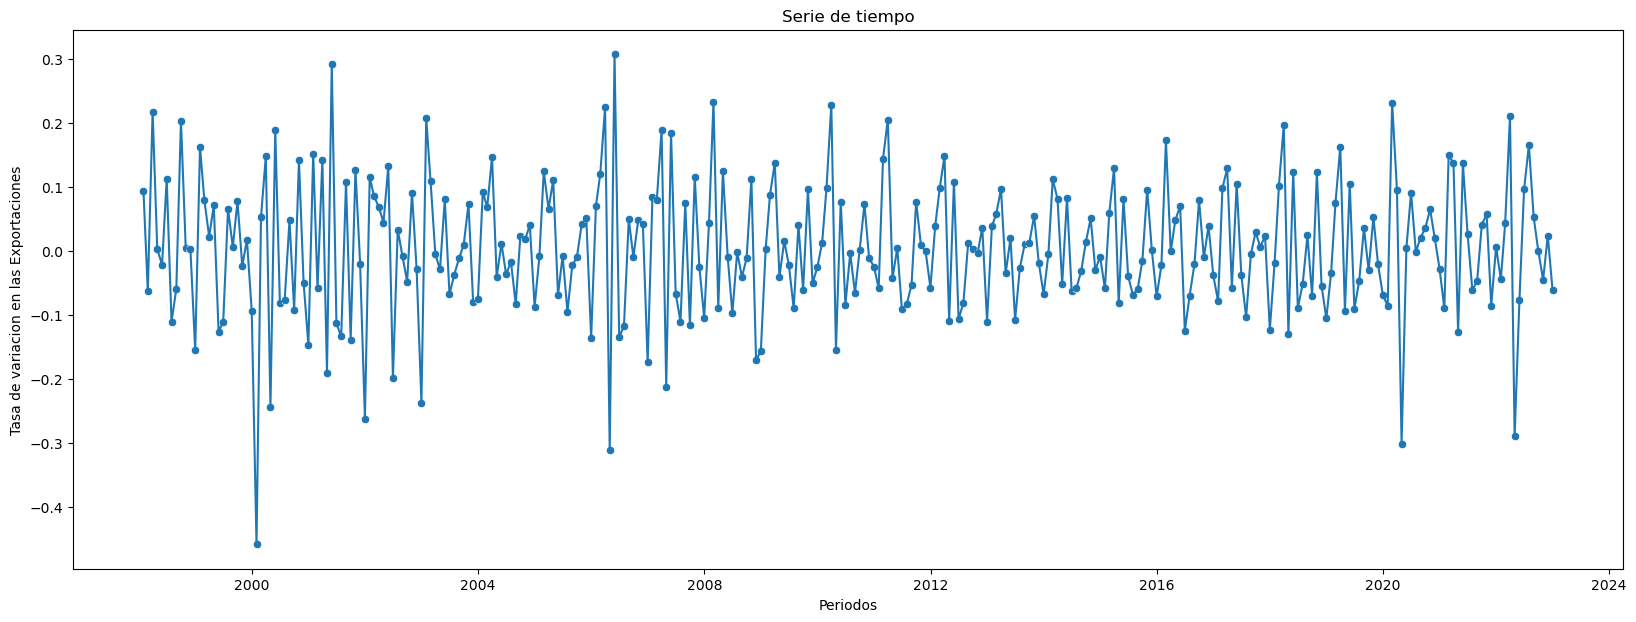

In [8]:
plt.figure(figsize = (20,7))
plt.plot(datos.index, datos['Ln(ExpFOB)'])
sns.scatterplot(data = datos, x = 'Mes', y = 'Ln(ExpFOB)');
plt.xlabel('Periodos')
plt.ylabel('Tasa de variacion en las Exportaciones')
plt.title('Serie de tiempo')
plt.show()

### *Librerías específicas para realizar el pronóstico*

In [24]:
# librerias especificas para esto 
from statsmodels.tsa.api import SimpleExpSmoothing
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [25]:
# importamos la libreria para holt 
from statsmodels.tsa.api import Holt

In [26]:
# tiramos el modelo 
# optimize = True lo que hace es optimizar los coeficientes alpha y beta
modelo = Holt(datos['ExpFOB']).fit(optimized = True)

In [28]:
# veamos que valores utilizo 
modelo.summary()

Dep. Variable:,ExpFOB,No. Observations:,301
Model:,Holt,SSE,1418557.537
Optimized:,True,AIC,2553.870
Trend:,Additive,BIC,2568.699
Seasonal:,None,AICC,2554.156
Seasonal Periods:,None,Date:,"Tue, 13 Jun 2023"
Box-Cox:,False,Time:,23:31:27
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5886465,alpha,True
smoothing_trend,0.0357000,beta,True


# Alpha = 0.5886465
# Beta = 0.0357000

## *Asignamos los valores estimados al dataframe original*

In [29]:

datos['Holt'] = modelo.fittedvalues

In [30]:
datos

,Tiempo,Mes,ExpFOB,Ln(ExpFOB),Holt
0,1,1997-12-31,357.601980,NaN,366.662167
1,2,1998-01-31,392.519491,0.093166,370.281389
2,3,1998-02-28,368.733105,-0.062513,392.791566
3,4,1998-03-31,458.557503,0.218013,387.543851
4,5,1998-04-30,459.825590,0.002762,439.752335
...,...,...,...,...,...
296,297,2022-08-31,1408.330750,0.052788,1257.037322
297,298,2022-09-30,1408.062357,-0.000191,1356.354526
298,299,2022-10-31,1346.084321,-0.045015,1398.137637
299,300,2022-11-30,1378.724975,0.023959,1377.748225


## *Realizamos la proyección de datos a t+3*

In [31]:
exp_f = modelo.forecast(3)

exp_f

301    1342.640528
302    1350.974537
303    1359.308545
dtype: float64

### *Realizamos un gráfico que posee los observados, estimados y los proyectados*

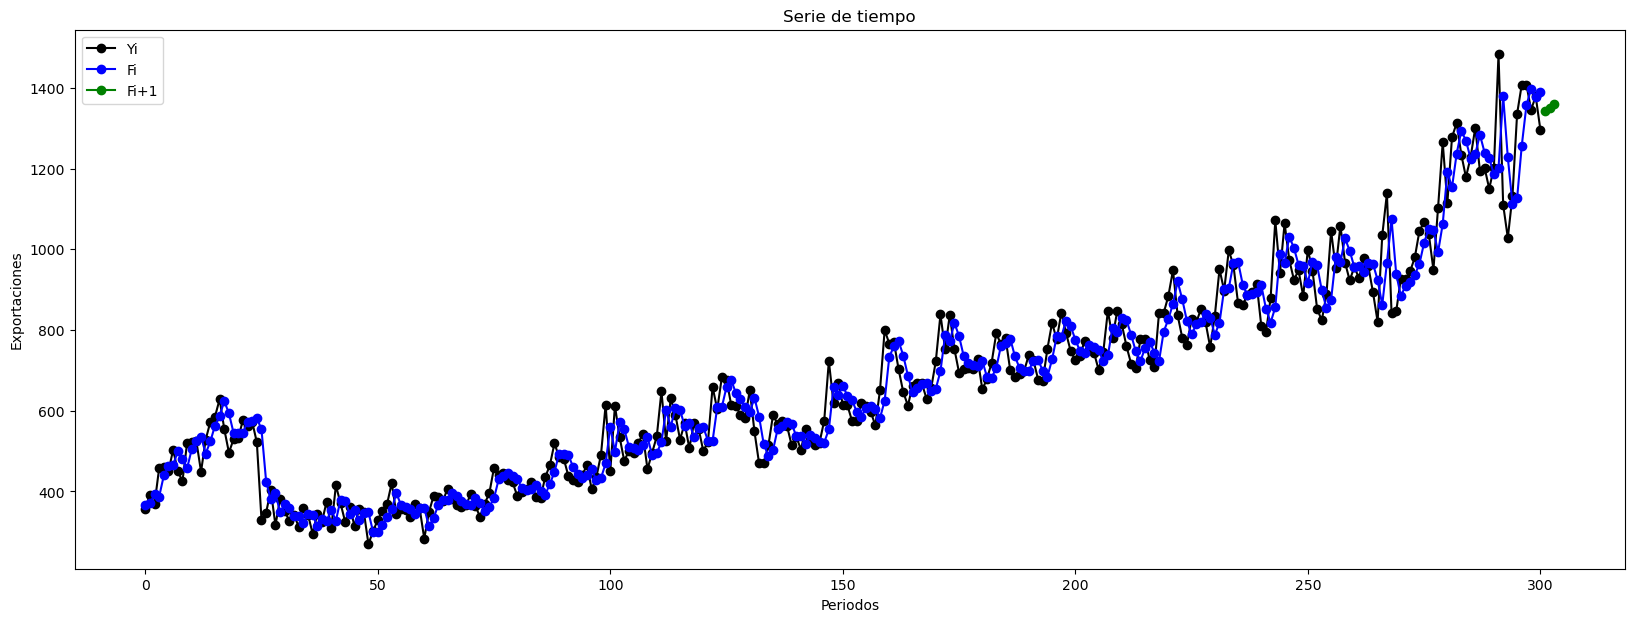

In [32]:

# voy a crear un grafico donde se observe la predicción en otro color 
plt.figure(figsize = (20,7))
plt.plot(datos.index, datos['ExpFOB'], '-o', color = 'black', label = 'Yi')
plt.plot(datos.index, datos['Holt'], '-o', color = 'blue', label = 'Fi')
plt.plot(exp_f, '-o', color = 'green', label = 'Fi+1')
plt.xlabel('Periodos')
plt.ylabel('Exportaciones')
plt.title('Serie de tiempo')
plt.legend(loc='best')
plt.show()

## *Errores*

In [18]:

# busquemos el error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as MAPE
import math 
     

In [35]:
# imprimimos directamente lo que viene siendo los errores de la aproximación 
print("_"*40)
print("MSE es igual a ", MSE(datos["ExpFOB"], datos["Holt"]))
print("_"*40)
print("RMSE es igual a ", math.sqrt(MSE(datos["ExpFOB"], datos["Holt"])))
print("_"*40)
print("MAPE es igual a ", MAPE(datos["ExpFOB"], datos["Holt"]))
print("_"*40)

________________________________________
MSE es igual a  4712.815738613222
________________________________________
RMSE es igual a  68.64995075463071
________________________________________
MAPE es igual a  0.07688499161381226
________________________________________


# Bibliografía y Documentación de las Librerías

##### Referencias Bibliográficas
- Gonzalezhomar. (2022, January 5). Herramientas para Pronósticos de Series de Tiempo en Python — Parte 2: Holt-Winters. Medium. https://medium.com/tacosdedatos/herramientas-para-pron%C3%B3sticos-de-series-de-tiempo-en-python-parte-2-holt-winters-adb1bd0d7b84
- Betancourt, D. (2022, March 22). Suavización exponencial doble o modelo Holt + Ejemplo Excel. Ingenio Empresa. https://www.ingenioempresa.com/suavizacion-exponencial-doble/
##### Documentación Librerías
- Numpy : https://numpy.org/doc/stable/
- Pandas : https://pandas.pydata.org/docs/getting_started/index.html
- Statsmodels : https://www.statsmodels.org/devel/index.html
- Matplotlib : https://matplotlib.org/stable/gallery/index.html
- Seaborn : https://seaborn.pydata.org/
- Scikit-Learn : https://scikit-learn.org/stable/